In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../..')
#sys.path.append( '/home/cactuskid13/miniconda3/pkgs/')
print(sys.path)

['/home/cactuskid13/pyprofiler/pyprofiler/notebooks', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python37.zip', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/lib-dynload', '', '/home/cactuskid13/.local/lib/python3.7/site-packages', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages', '/home/cactuskid13/pyham', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/IPython/extensions', '/home/cactuskid13/.ipython', '../..']


In [63]:
#using the profiler. It's easy!
#lets import the profiler, configuration file and some tools for GO analysis to look at our returned results
from pyprofiler.utils import config_utils
import pyprofiler.utils.goatools_utils as goa
import pyprofiler.utils.hashutils as hashutils
import seaborn as sns

import pyprofiler.profiler as profiler
import pandas as pd
import numpy as np

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [5]:
#lets load a compiled db containing the OMA root HOGs into a profiler oject 
p = profiler.Profiler(lshforestpath = '../all/all/jun_all_512/newlshforest.pkl' , mastertree=  '../all/all/jun_all_512_master_tree.pkl', hashes_h5= '../all/all/jun_all_512/hashes.h5' , mat_path= None, oma = '/home/cactuskid13/mntpt/OMA/jun//OmaServer.h5', tar= None , nsamples = 512)

loading lsh
indexing lsh


Cannot load SequenceSearch. Any future call to seq_search will fail!
Traceback (most recent call last):
  File "../../pyprofiler/pyoma/browser/db.py", line 879, in __init__
    self.seq_idx = self.seq_idx()
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/link.py", line 397, in __call__
    self.extfile = tables.open_file(filename, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 320, in open_file
    return File(filename, mode, title, root_uep, filters, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 784, in __init__
    self._g_new(filename, mode, **params)
  File "tables/hdf5extension.pyx", line 374, in tables.hdf5extension.File._g_new
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/utils.py", line 157, in check_file_access
    raise IOError("``%s`` does not exist" % (filena

3115
DONE


In [6]:
def grabHog(ID):
    try:
        return p.db_obj.entry_by_entry_nr(p.db_obj.id_resolver.resolve(ID))[4].decode()
    except:
        return np.nan



In [7]:
import gzip 
import glob

stringfiles = glob.glob( '/home/cactuskid13/mntpt/stringdat/*.gz')
print(stringfiles)
#for zipfile in stringfiles:
with gzip.open(stringfiles[0], mode='rb', compresslevel=9, encoding=None, errors=None, newline=None) as stringin:
    stringnet = pd.read_csv(stringin, sep =' ')
    print(stringnet.head())

['/home/cactuskid13/mntpt/stringdat/9606.protein.links.full.v11.0.txt.gz', '/home/cactuskid13/mntpt/stringdat/362663.protein.links.full.v11.0.txt.gz', '/home/cactuskid13/mntpt/stringdat/4932.protein.links.full.v11.0.txt.gz', '/home/cactuskid13/mntpt/stringdat/6239.protein.links.full.v11.0.txt.gz', '/home/cactuskid13/mntpt/stringdat/3702.protein.links.full.v11.0.txt.gz', '/home/cactuskid13/mntpt/stringdat/309800.protein.links.full.v11.0.txt.gz']
               protein1              protein2  neighborhood  \
0  9606.ENSP00000000233  9606.ENSP00000272298             0   
1  9606.ENSP00000000233  9606.ENSP00000253401             0   
2  9606.ENSP00000000233  9606.ENSP00000401445             0   
3  9606.ENSP00000000233  9606.ENSP00000418915             0   
4  9606.ENSP00000000233  9606.ENSP00000327801             0   

   neighborhood_transferred  fusion  cooccurence  homology  coexpression  \
0                         0       0          332         0             0   
1                   

Index(['protein1', 'protein2', 'neighborhood', 'neighborhood_transferred',
       'fusion', 'cooccurence', 'homology', 'coexpression',
       'coexpression_transferred', 'experiments', 'experiments_transferred',
       'database', 'database_transferred', 'textmining',
       'textmining_transferred', 'combined_score'],
      dtype='object')
['protein1', 'protein2', 'neighborhood', 'fusion', 'cooccurence', 'homology', 'coexpression', 'experiments', 'database', 'textmining', 'combined_score']


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


               protein1              protein2  neighborhood  fusion  \
0  9606.ENSP00000000233  9606.ENSP00000272298             0       0   
1  9606.ENSP00000000233  9606.ENSP00000253401             0       0   
2  9606.ENSP00000000233  9606.ENSP00000401445             0       0   
3  9606.ENSP00000000233  9606.ENSP00000418915             0       0   
4  9606.ENSP00000000233  9606.ENSP00000327801             0       0   

   cooccurence  homology  coexpression  experiments  database  textmining  \
0          332         0             0            0         0           0   
1            0         0             0            0         0           0   
2            0         0             0            0         0           0   
3            0         0             0            0         0         542   
4            0         0            69            0         0           0   

   combined_score  
0               0  
1               0  
2               0  
3             542  
4         

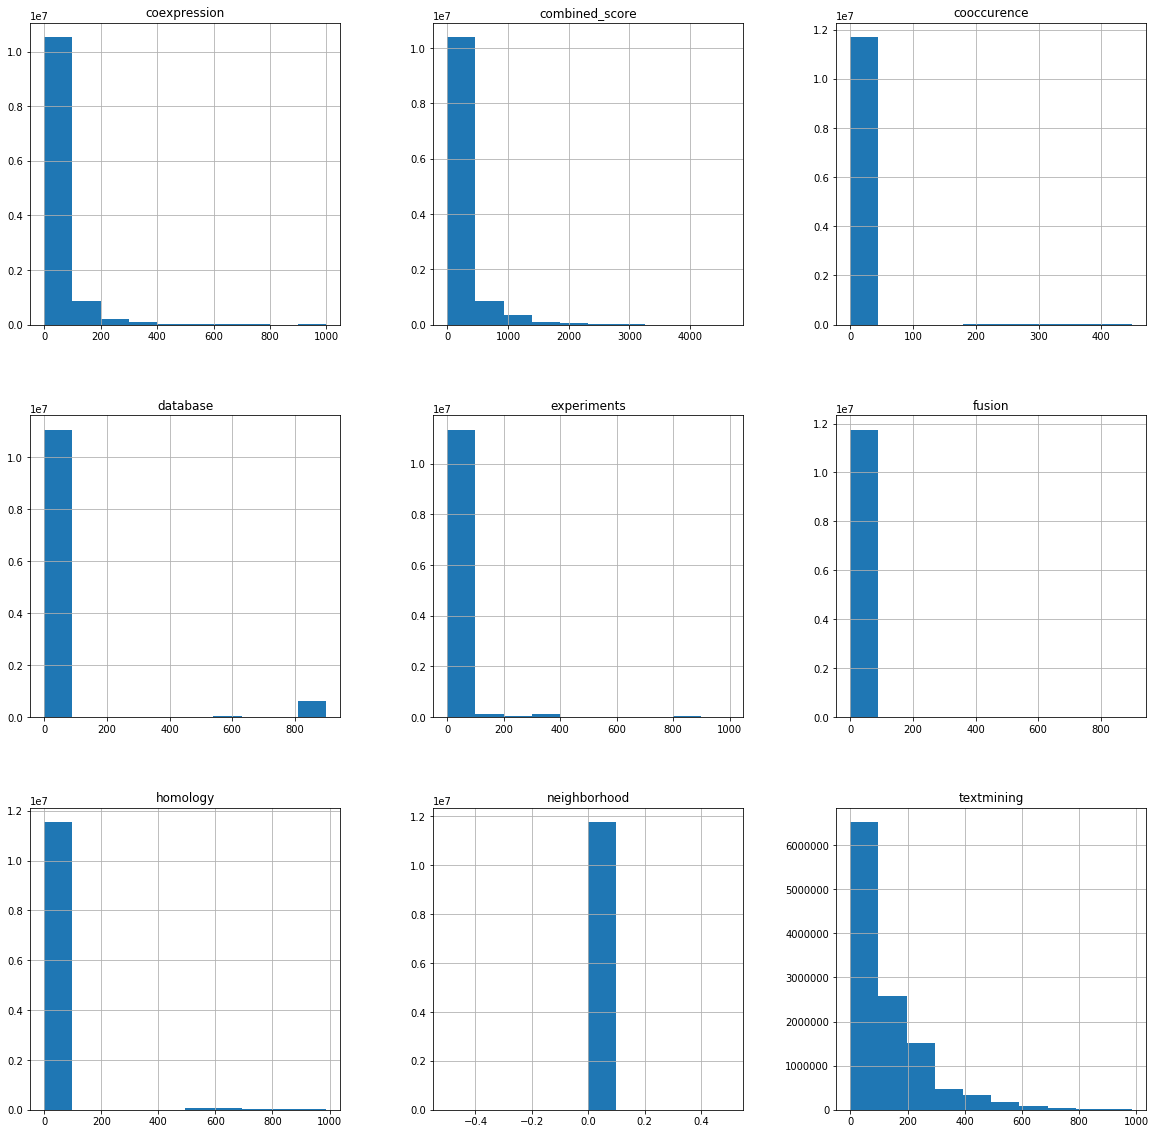

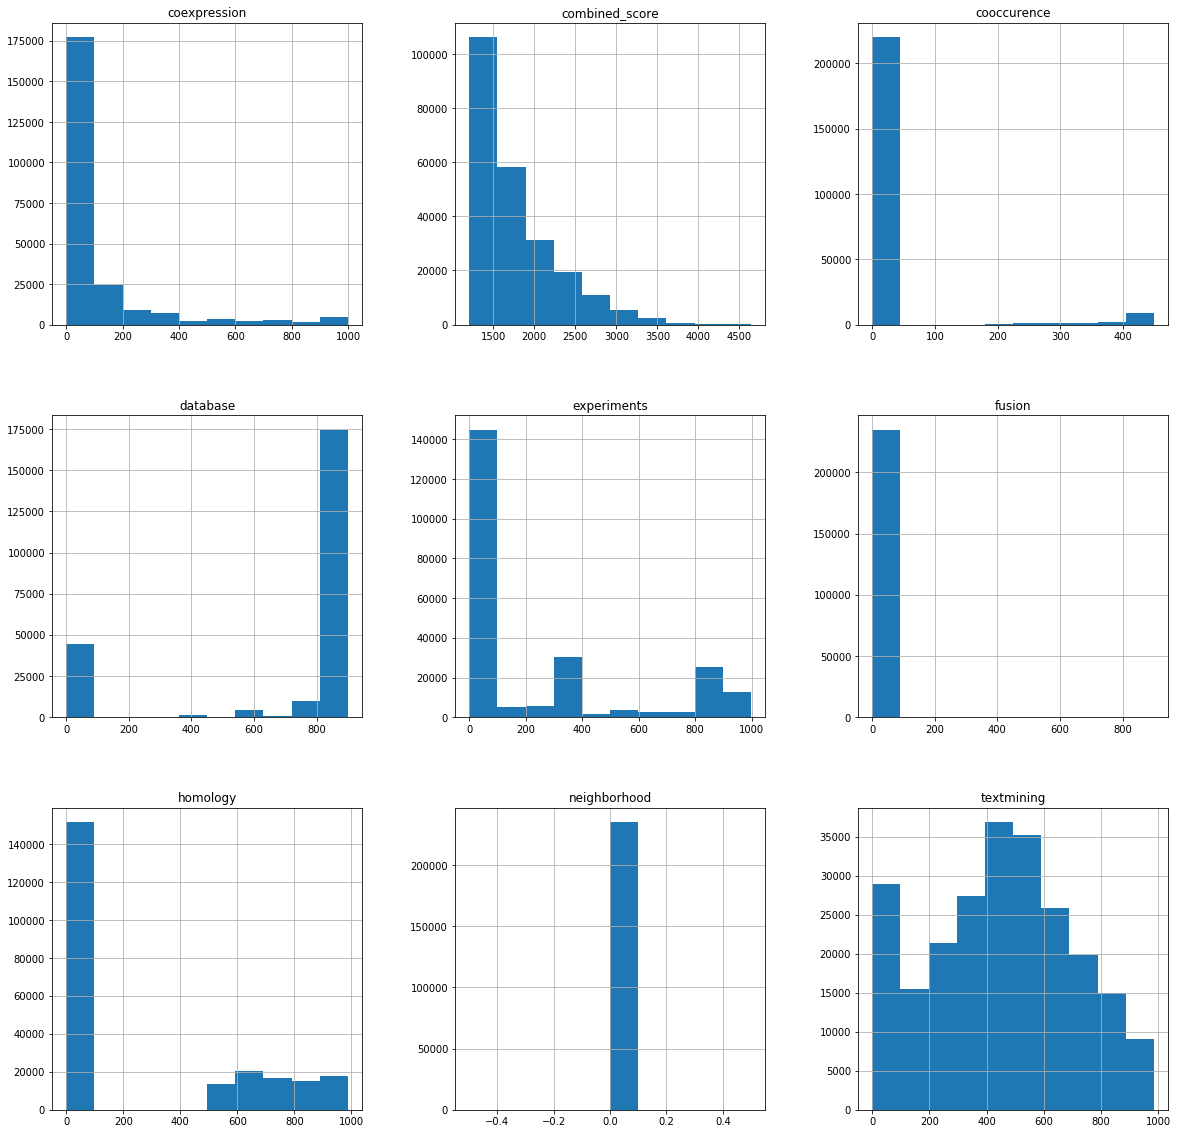

In [8]:


print(stringnet.columns)
select = [ c for c in stringnet.columns if 'transferred' not in c ]
print(select)
stringnet_nointerlogs =  stringnet[ select]
#stringnet_nointerlogs=stringnet_nointerlogs.drop('cooccurence' ,axis= 1)
stringnet_nointerlogs.combined_score = stringnet_nointerlogs[ [ 'neighborhood' , 'fusion' , 'homology' , 'coexpression' , 'experiments' , 'database' , 'textmining' ]].sum(axis = 1) 
print(stringnet_nointerlogs.head())
pd.DataFrame.hist(stringnet_nointerlogs , figsize=( 20 ,20 ))
gold_standard = stringnet_nointerlogs[ stringnet_nointerlogs.combined_score > stringnet_nointerlogs.combined_score.quantile(  q = .98)]
pd.DataFrame.hist(gold_standard , figsize=( 20 ,20 ))
print(len(gold_standard))



In [ ]:
prots= set( list(gold_standard.protein1) + list(gold_standard.protein2) )
print(len(prots))

In [17]:

protmap ={ p:grabHog(p.split('.')[1]) for p in prots}

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/leaf.py:414: PerformanceWarning: The Leaf ``/Protein/_i_Entries/OmaHOG/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


In [18]:
gold_standard['Hog1'] = gold_standard.protein1.map(protmap)
gold_standard['Hog2'] = gold_standard.protein2.map(protmap)
print(gold_standard.head())



   Unnamed: 0              protein1              protein2  neighborhood  \
0          78  9606.ENSP00000000233  9606.ENSP00000314615             0   
1         139  9606.ENSP00000000233  9606.ENSP00000310226             0   
2         240  9606.ENSP00000000233  9606.ENSP00000297044             0   
3         250  9606.ENSP00000000233  9606.ENSP00000272217             0   
4         367  9606.ENSP00000000233  9606.ENSP00000249923             0   

   fusion  cooccurence  homology  coexpression  experiments  database  \
0       0            0         0            61            0       900   
1       0            0       659            96            0       900   
2       0            0         0             0            0       900   
3       0            0       845            81            0         0   
4       0            0         0            47            0       900   

   textmining  combined_score                                Hog1  \
0         473            1434  HOG:042214

In [ ]:
#save the gold standard set w hogs
gold_standard.to_csv(stringfiles[0]+'filter.csv')

In [9]:
#read gold standara csv

gold_standard = pd.read_csv(stringfiles[0]+'filter.csv')

In [10]:
#select a node to generate a small network of known positives
#tsnare
start_prot = '9606.ENSP00000480707'

neighbors_iter=3
#get neighborhood
#make subdf of the hood



print(len(gold_standard))
gold_standard['fam1']= gold_standard.Hog1.map(hashutils.hogid2fam)
gold_standard['fam2']= gold_standard.Hog2.map(hashutils.hogid2fam)
gold_standard = gold_standard[~gold_standard.fam1.isnull()  & ~gold_standard.fam2.isnull()]

gold_standard['fam1']= gold_standard['fam1'].astype(int)
gold_standard['fam2']= gold_standard['fam2'].astype(int)

grablist = set([start_prot])

#change this to a less stringent dataset for getting the subnet...
#this could be masking good interactions

for i in range(neighbors_iter):
    sub =  gold_standard[gold_standard.protein1.isin(grablist) | gold_standard.protein2.isin(grablist)  ]
    print(i)
    [grablist.add( p )  for p in list(sub.protein1.unique())]
    [grablist.add( p )  for p in list(sub.protein2.unique())]
#grab subdf close to the initial query


print(sub.head())
print(len(sub))
print( len( grablist ) )

235154
0
1
2
   Unnamed: 0  Unnamed: 0.1              protein1              protein2  \
0           0            78  9606.ENSP00000000233  9606.ENSP00000314615   
1           1           139  9606.ENSP00000000233  9606.ENSP00000310226   
3           3           250  9606.ENSP00000000233  9606.ENSP00000272217   
4           4           367  9606.ENSP00000000233  9606.ENSP00000249923   
5           5           441  9606.ENSP00000000233  9606.ENSP00000387286   

   neighborhood  fusion  cooccurence  homology  coexpression  experiments  \
0             0       0            0         0            61            0   
1             0       0            0       659            96            0   
3             0       0            0       845            81            0   
4             0       0            0         0            47            0   
5             0       0            0       659            47            0   

   database  textmining  combined_score                                Ho

193


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[[   0.    0.    0. ... 2608.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 ...
 [2608.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
894


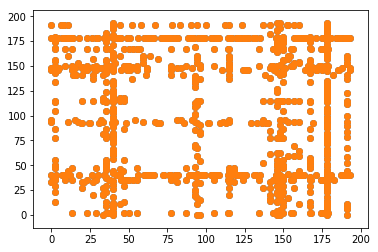

In [11]:
#define connectivity matrix
from matplotlib import pyplot as plt



connectmat = np.zeros((len(grablist), len(grablist)))
connectmat_binary = np.zeros( ( len(grablist), len(grablist)) )

protindex={ p:i for i,p in enumerate(grablist)}
print(max(protindex.values()))
sub['row']= sub.protein1.map(protindex)
sub['column'] = sub.protein2.map(protindex)

#symmetric connectivity matrix
connectmat[sub.row, sub.column] = sub.combined_score
connectmat+= connectmat.T
print(connectmat)
connectmat_binary[sub.row, sub.column] = sub.combined_score
connectmat_binary+= connectmat_binary.T


print(len(sub))
plt.scatter(sub.row, sub.column)
plt.scatter(sub.column, sub.row)
plt.show()
#this is the ground truth mat
#might not be complete but these should be considered true positives


In [12]:
#create data for our explicit comparisons
from pyprofiler.utils import hashutils
import ete3
allhogs = set([])
[allhogs.add( h ) for h in gold_standard.Hog1.unique()]
[allhogs.add( h ) for h in gold_standard.Hog2.unique()]
allhogs = set([ hashutils.hogid2fam(h) for h in allhogs ])
print(len(allhogs))

explicit_profiles = p.retmat_mp_profiles( allhogs , nworkers= 40 )


8122


[INFO/Process-1] child process calling self.run()


worker start0


[INFO/Process-2] child process calling self.run()
[INFO/Process-3] child process calling self.run()


worker start1
worker start2


[INFO/Process-4] child process calling self.run()


worker start3


[INFO/Process-5] child process calling self.run()


worker start4


[INFO/Process-6] child process calling self.run()


worker start5


[INFO/Process-7] child process calling self.run()


worker start6


[INFO/Process-8] child process calling self.run()


worker start7


[INFO/Process-9] child process calling self.run()


worker start8


[INFO/Process-10] child process calling self.run()


worker start9


[INFO/Process-11] child process calling self.run()


worker start10


[INFO/Process-12] child process calling self.run()


worker start11


[INFO/Process-13] child process calling self.run()


worker start12


[INFO/Process-14] child process calling self.run()


worker start13


[INFO/Process-15] child process calling self.run()


worker start14


[INFO/Process-16] child process calling self.run()


worker start15


[INFO/Process-17] child process calling self.run()


worker start16


[INFO/Process-18] child process calling self.run()


worker start17


[INFO/Process-19] child process calling self.run()


worker start18


[INFO/Process-20] child process calling self.run()


worker start19


[INFO/Process-21] child process calling self.run()


worker start20


[INFO/Process-22] child process calling self.run()


worker start21


[INFO/Process-23] child process calling self.run()


worker start22


[INFO/Process-24] child process calling self.run()


worker start23


[INFO/Process-25] child process calling self.run()


worker start24


[INFO/Process-26] child process calling self.run()


worker start25


[INFO/Process-27] child process calling self.run()


worker start26


[INFO/Process-28] child process calling self.run()


worker start27


[INFO/Process-29] child process calling self.run()


worker start28


[INFO/Process-30] child process calling self.run()


worker start29


[INFO/Process-31] child process calling self.run()


worker start30


[INFO/Process-32] child process calling self.run()


worker start31


[INFO/Process-33] child process calling self.run()


worker start32


[INFO/Process-34] child process calling self.run()


worker start33


[INFO/Process-35] child process calling self.run()


worker start34


[INFO/Process-36] child process calling self.run()


worker start35


[INFO/Process-37] child process calling self.run()


worker start36


[INFO/Process-38] child process calling self.run()


worker start37


[INFO/Process-39] child process calling self.run()


worker start38


[INFO/Process-40] child process calling self.run()


worker start39
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100


In [13]:
print(explicit_profiles)



                                                      mat  \
350245  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350266  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350295  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350303  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350330  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350336  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350454  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350727  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350732  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350809  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350819  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350821  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350825  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350881  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
350901  [[0.0, 0.0, 0.0,

In [14]:
import ete3
taxonomy = p.tree
taxindex ={ n:i for i,n in enumerate(taxonomy.traverse())}
reverse ={ i:n for i,n in enumerate(taxonomy.traverse())}


In [15]:
#mapfam to matrow
fam_map= { f:i for i,f in enumerate(explicit_profiles.index)}
profilemat = np.vstack(explicit_profiles.mat)


In [16]:


print(len(allhogs))
#filter out the entries in sub that don't have a profile

sub=sub[ sub.fam1.isin(fam_map) & sub.fam2.isin(fam_map)]
gold_standard = gold_standard[ gold_standard.fam1.isin(fam_map) & gold_standard.fam2.isin(fam_map)]

print(len(sub))


8122
862


In [17]:
#use all of the gold standard to train and use the subnet to quantify
import itertools

def chunks(df, n):
    for i in range(0, len(df), n):
        yield df.iloc[i:i + n]
        
def generateXYchunk(explicit_profiles, goldstandardDF,  nsamples=100, posi_percent = .5):
    #shuffle
    goldstandardDF = goldstandardDF.sample(frac=1)
    for chunkdf in chunks(goldstandardDF , int( nsamples*posi_percent)):
        #negatives drawn from the overall dataset
        X = np.hstack([ np.vstack([profilemat[fam_map[f]] for f in chunkdf.fam1]) , np.vstack([profilemat[fam_map[f]] for f in chunkdf.fam2]) ] )
        Y = [1]* X.shape[0]
        neg1 = list(goldstandardDF.sample(n = int(nsamples*(1-posi_percent))).fam1)
        neg2 = list(goldstandardDF.sample(n = int(nsamples*(1-posi_percent))).fam2)
        
        if len(neg1)>0:
            mixchunk = np.hstack([np.vstack([profilemat[fam_map[f]] for f in neg1]),np.vstack([profilemat[fam_map[f]] for f in neg2])])
            Y =np.hstack([[0]* mixchunk.shape[0] , Y])
            X= np.vstack([mixchunk,X])    
        #positive samples
        yield X, Y
    

def Testwsubnet(explicit_profiles, sub ):
    
    print(len(sub))
    
    Xposi = np.hstack([ np.vstack([profilemat[fam_map[f]] for f in sub.fam1]) , np.vstack([profilemat[fam_map[f]] for f in sub.fam2]) ] )
    print(Xposi.shape)
    pospairs = set(zip( list(sub.fam1) , list(sub.fam2)))
    
    allsubfams = set( list(sub.fam1) +list(sub.fam2) )
    
    nega = set( [(f1,f2) for f1,f2 in itertools.combinations(allsubfams,2) if (f1,f2) not in pospairs] )
    Xnega = np.vstack( [ np.hstack( [ profilemat[fam_map[f1]] , profilemat[fam_map[f2]] ]  )  for f1,f2 in nega ] )
    print(Xnega.shape)
    X = np.vstack([Xnega,Xposi])
    Y = np.hstack([[0]*Xnega.shape[0], [1]*Xposi.shape[0]])
    
    return X, Y

In [175]:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def ROC_curve(y_data):

    plt.figure(figsize=(10,10))
    plt.plot([0, 1], [0, 1], 'k--')
    for l in y_data:
        print(l)
        
        y_pred_grd = y_data[l]['Ytrue']
        y_test = y_data[l]['Ypred']
        
        
        fpr, tpr, _ = roc_curve(   y_pred_grd ,y_test)
        plt.plot(fpr, tpr, label=l + 'auc'+ str(auc(fpr, tpr) ))
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
    
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize=(10,10))

    for l in y_data:
        y_pred_grd = y_data[l]['Ytrue']
        y_test = y_data[l]['Ypred']
        
        precision, recall, thresholds = precision_recall_curve( y_pred_grd, y_test)
        plt.plot(precision, recall , label= l )
        plt.xlabel('Precision')
        plt.ylabel('Recall')
    
    plt.title('PR curve')
    plt.legend(loc='best')
    plt.show()

    
def ROC_curve_single(y_test, y_pred_grd):
    fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(y_test, y_pred_grd)
    plt.plot(fpr, tpr, label='single')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

    precision, recall, thresholds = precision_recall_curve(  y_test , y_pred_grd)
    plt.plot(precision, recall , label='single')
    plt.xlabel('Precision')
    plt.ylabel('Recall')

    plt.title('PR curve')
    plt.legend(loc='best')
    plt.show()


In [173]:
fams = list(set( sub.fam1).union(set(sub.fam2)))

connectmat = np.zeros((len(fams), len(fams)))
connectmat_binary = np.zeros((len(fams), len(fams)))

protindex={ p:i for i,p in enumerate(fams)}

sub['famrow']= sub.fam1.map(protindex)
sub['famcolumn'] = sub.fam2.map(protindex)

#symmetric connectivity matrix
connectmat[sub.famrow, sub.famcolumn] = sub.combined_score
connectmat+= connectmat.T
print(connectmat)

connectmat_binary[sub.famrow, sub.famcolumn] = 1
np.fill_diagonal( connectmat_binary , 1 )
print(connectmat_binary)
#connectmat_binary+= connectmat_binary.T

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0. 2746.]
 [   0.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 5312.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0. 2746.    0. ...    0.    0.    0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


In [19]:
ydata = {}

In [25]:
Xtest, Ytest = Testwsubnet(explicit_profiles, sub )
print(Xtest.shape)
print(Ytest)

862
(862, 18690)
(6877, 18690)
(7739, 18690)
[0 0 0 ... 1 1 1]


In [140]:
from sklearn.neural_network import BernoulliRBM
#idea. clamp one profile to generate all possible interactors
#use to query lsh.

generator = generateXYchunk(explicit_profiles, gold_standard , posi_percent= .5 , nsamples = 50 )
rbm = BernoulliRBM(random_state=0, verbose=True , learning_rate=0.10, batch_size=50, n_iter= 100   )
rbm.n_components = 50

maxsamples = 3000

for i, sample in enumerate(generator):
    x,y = sample
    if i % 100 == 0: 
        print(i)
    rbm.partial_fit(x,y)
    if i - maxsamples == 0:
        break

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [141]:
generator = generateXYchunk(explicit_profiles, gold_standard , posi_percent= .5 , nsamples = 50 )
maxiter = 3000
Y = []
X_rbm1 = []
for i, sample in enumerate(generator):
    x,y = sample
    if i % 100 == 0 :
        print(i)
    if i - maxiter == 0 :
        break
    X_rbm1.append(rbm.transform( x) )
    Y.append(y)

X_rbm1 = np.vstack( X_rbm1 )
Y = np.hstack(Y)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [142]:
print(X_rbm1)
print(Y)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  2.23225415e-16 1.00000000e+00]
 [6.63936043e-41 5.64702783e-84 0.00000000e+00 ... 1.00000000e+00
  6.66883561e-47 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 9.33082947e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
[0 0 0 ... 1 1 1]


In [143]:
from sklearn.svm import LinearSVR
regr = LinearSVR(random_state=0, tol=1e-5 , )
regr.fit(X_rbm1 , Y)

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

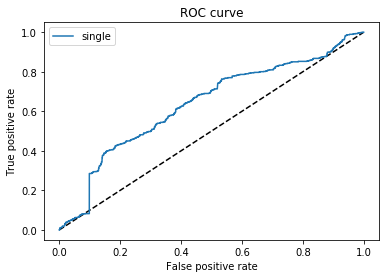

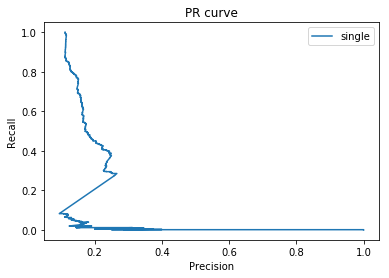

In [144]:

ypred_rbm = regr.predict( rbm.transform(Xtest))
ydata.update( {'RBM':{ 'Ytest': ypred_rbm , 'Ytrue':Ytest} } )

ROC_curve_single( Ytest ,  ypred_rbm )
import pickle 

with open( 'rbm_human.pkl' , 'wb')as rbmout:
    rbmout.write(pickle.dumps([rbm,regr]))

def rbm_pipeline(X):
    return( regr.predict(rbm.transform(X)))

In [30]:
#try a vanilla deep NN
from keras.layers import Dense, Input
from keras.models import Sequential
import os

from keras.models import load_model
modelpath = './human_profilepairs_DNN.h5'

if os.path.exists(modelpath):
    model = load_model(modelpath)
else:

    model = Sequential()
    model.add(Dense(units=100, activation='sigmoid', input_dim=Xtest.shape[1]))
    model.add(Dense(units=50, activation='sigmoid' ) )
    model.add(Dense(units=1, activation='sigmoid' ) )
model.compile(loss='binary_crossentropy', optimizer='ADAGRAD', metrics=['accuracy'])

W0427 08:00:53.113588 139951299720576 deprecation_wrapper.py:119] From /home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0427 08:00:53.130815 139951299720576 deprecation_wrapper.py:119] From /home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0427 08:00:53.182835 139951299720576 deprecation_wrapper.py:119] From /home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0427 08:00:53.183521 139951299720576 deprecation_wrapper.py:119] From /home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/keras/backend/tensorflow_back

In [31]:
generator = generateXYchunk(explicit_profiles, gold_standard , posi_percent= .5 , nsamples = 50 )

model.fit_generator(itertools.cycle(generator) , steps_per_epoch = 3000 , epochs = 100)

[INFO/MainProcess] allocating a new mmap of length 4096


Epoch 1/100
3000/3000 [==============================] - 57s 19ms/step - loss: 0.5551 - acc: 0.7283
Epoch 2/100
3000/3000 [==============================] - 88s 29ms/step - loss: 0.4820 - acc: 0.7611
Epoch 3/100
3000/3000 [==============================] - 20s 7ms/step - loss: 0.4511 - acc: 0.7799
Epoch 4/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4429 - acc: 0.7851
Epoch 5/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4263 - acc: 0.7951
Epoch 6/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4228 - acc: 0.7982
Epoch 7/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4119 - acc: 0.8041
Epoch 8/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4087 - acc: 0.8074
Epoch 9/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4011 - acc: 0.8107
Epoch 10/100
3000/3000 [==============================] - 20s 7ms/step - loss: 0.3988 - acc: 0.8126
Epoch 1

In [ ]:
# Save the model
model.save('./human_profilepairs_DNN.h5')


In [177]:
print(profilemat.shape)

(8121, 9345)


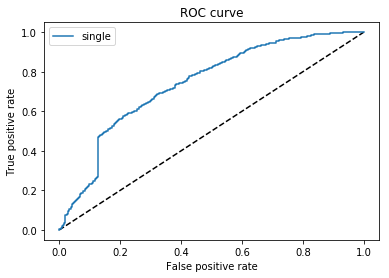

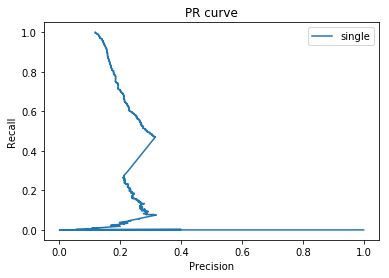

In [34]:
ypred_nn = model.predict( Xtest)
ydata.update( {'RBM':{ 'Ytest': ypred_nn , 'Ytrue':Ytest} } )
ROC_curve_single( Ytest ,  ypred_nn )


In [71]:
from scipy import linalg
from sklearn.covariance import GraphicalLassoCV , GraphicalLassoCV , EmpiricalCovariance

subprofiles = np.vstack([profilemat[fam_map[f]] for f in fams])
print(subprofiles.shape)

#use mean field
mf = GraphicalLassoCV(n_jobs = -1)
mf.fit(subprofiles.T)


(120, 9345)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GraphicalLassoCV(alphas=4, assume_centered=False, cv='warn', enet_tol=0.0001,
                 max_iter=100, mode='cd', n_jobs=-1, n_refinements=4,
                 tol=0.0001, verbose=False)

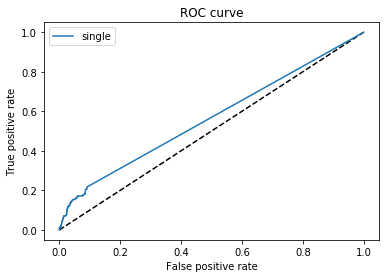

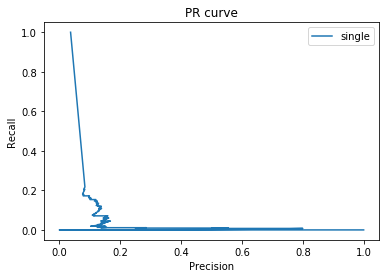

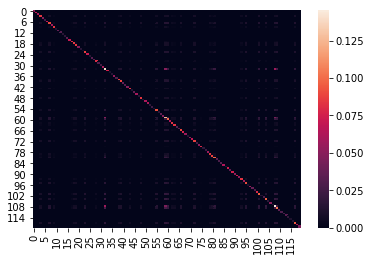

In [72]:
#sns.heatmap( mf._precision )
plt.show()
ROC_curve_single(  connectmat_binary.ravel() , mf.covariance_.ravel() )
sns.heatmap(mf.covariance_)


In [ ]:
with open( 'mf_human.pkl' , 'wb') as mfout:
    mfout.write(pickle.dumps(mf))

NN
RBM
EMP_COV
MF_DCA
PL_DCA
JACCARD


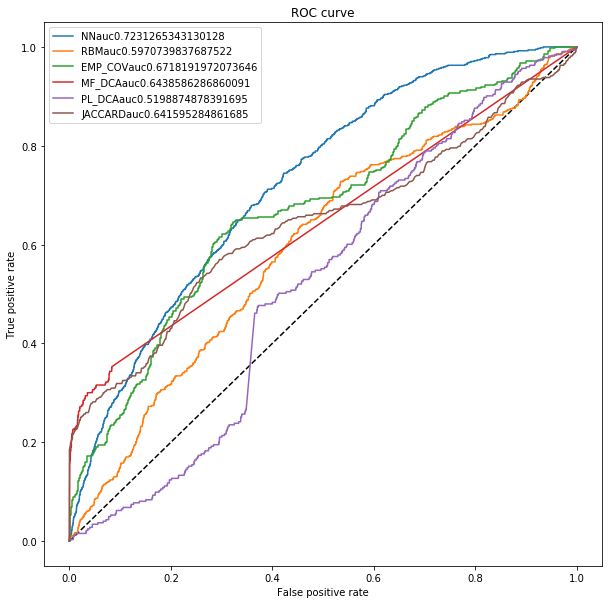

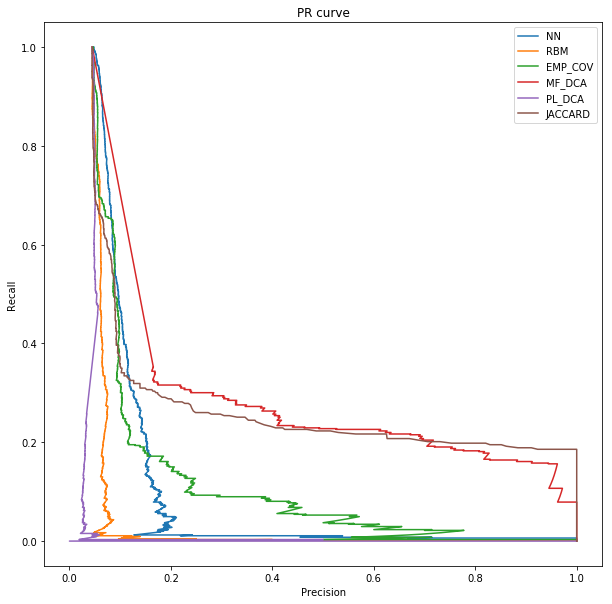

In [176]:
#use covariance

ydata = { 'NN': {'Ytrue':connectmat_binary.ravel(), 'Ypred': ymatnn.ravel() } , 'RBM':{'Ytrue':connectmat_binary.ravel() , 'Ypred': ymatrbm.ravel()} , 'EMP_COV': {'Ytrue':connectmat_binary.ravel(),'Ypred':emp.covariance_.ravel() } , 
         'MF_DCA':{'Ytrue':connectmat_binary.ravel(),'Ypred': mf.covariance_.ravel()} , 'PL_DCA':{'Ytrue':connectmat_binary.ravel(),'Ypred': predmat.ravel() } , 'JACCARD':{'Ytrue':connectmat_binary.ravel() , 'Ypred': jkern.ravel()  } }


ROC_curve(ydata)

In [52]:
                   
                        
emp = EmpiricalCovariance()
emp.fit(subprofiles.T)

EmpiricalCovariance(assume_centered=False, store_precision=True)

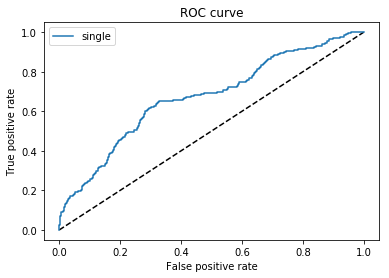

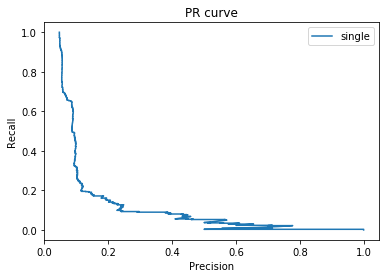

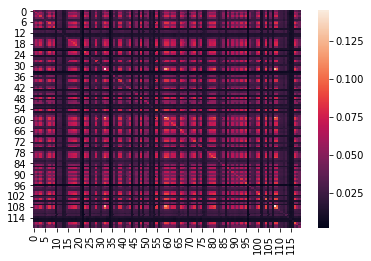

In [150]:
ROC_curve_single(  connectmat_binary.ravel(),   emp.covariance_.ravel()  )


sns.heatmap( emp.covariance_ )

In [78]:
#use DCA
import pydca
print(len(fams))
dca_profiles={}
for f in fams:
    msaprofile = p.return_profile_OTF_DCA( f )
    dca_profiles.update(msaprofile)
    print(msaprofile)



120
{411136: {'dcastr': chararray([b'A', b'A', b'P', ..., b'P', b'P', b'A'], dtype='|S1'), 'tree': Tree node '2759' (0x7f47d601824)}}
{419844: {'dcastr': chararray([b'A', b'A', b'P', ..., b'P', b'P', b'A'], dtype='|S1'), 'tree': Tree node '2759' (-0x7ffff80b82a0861c)}}
{409608: {'dcastr': chararray([b'A', b'A', b'P', ..., b'P', b'P', b'A'], dtype='|S1'), 'tree': Tree node '2759' (-0x7ffff80b82a4778c)}}
{416267: {'dcastr': chararray([b'A', b'A', b'P', ..., b'P', b'D', b'A'], dtype='|S1'), 'tree': Tree node '2759' (-0x7ffff80b82a92c70)}}
{401932: {'dcastr': chararray([b'A', b'A', b'A', ..., b'P', b'P', b'A'], dtype='|S1'), 'tree': Tree node '33154' (-0x7ffff80b82b61438)}}
{392721: {'dcastr': chararray([b'A', b'A', b'A', ..., b'P', b'P', b'A'], dtype='|S1'), 'tree': Tree node '6072' (-0x7ffff80b82b9faa8)}}
{407061: {'dcastr': chararray([b'A', b'A', b'P', ..., b'P', b'P', b'A'], dtype='|S1'), 'tree': Tree node '2759' (0x7f45081b3e1)}}
{405525: {'dcastr': chararray([b'A', b'A', b'P', ..., b

In [109]:
msadf = pd.DataFrame.from_dict( dca_profiles , orient = 'index' ) 

msablock = np.vstack( msadf.dcastr ).T

print(msablock.shape)
print(msablock)
print(msadf.shape)

#rows with no variation contain no info... filter them out
msastr = ''
for r in range( msablock.shape[0]):
    line = ''.join([ c.decode() for c in list(msablock[r,:]) ] ) + '\n'
    line = line.replace('P','U')
    line = line.replace('D','C')
    line = line.replace('L','T')
    
    if len(set(line))>2:
        msastr+='>taxaln_'+str(r)+'\n'
        msastr+= line

with open('human_dcafile.fa','w')as dcaout:
    dcaout.write(msastr)

(3115, 120)
[[b'A' b'A' b'A' ... b'A' b'A' b'A']
 [b'A' b'A' b'A' ... b'A' b'A' b'A']
 [b'A' b'A' b'A' ... b'P' b'P' b'P']
 ...
 [b'P' b'P' b'P' ... b'P' b'P' b'P']
 [b'P' b'P' b'P' ... b'P' b'P' b'P']
 [b'A' b'A' b'A' ... b'A' b'A' b'A']]
(120, 2)


In [113]:
# import pydca modules

import seaborn as sns

from pydca.plmdca import plmdca
from pydca.sequence_backmapper import sequence_backmapper
from pydca.msa_trimmer import msa_trimmer
from pydca.contact_visualizer import contact_visualizer
from pydca.dca_utilities import dca_utilities


dcafile = 'dcafile.fa'
plmdca_inst = plmdca.PlmDCA(
    dcafile,
    'rna',
    seqid = 0.01,
    lambda_h = 5.0,
    lambda_J = 5.0,
    num_threads = 30,
    max_iterations = 1000,
)

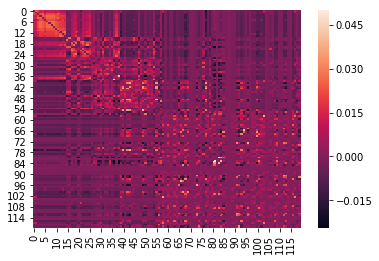

In [114]:
# compute DCA scores summarized by Frobenius norm and average product corrected
plmdca_FN_APC = plmdca_inst.compute_sorted_FN_APC()
#done, recover couplings here

predmat = np.zeros((len(fams), len(fams)))
for site_pair, score in plmdca_FN_APC:
    predmat[site_pair[0],site_pair[1]] = score
predmat+= predmat.T
sns.heatmap(predmat)

plt.show()

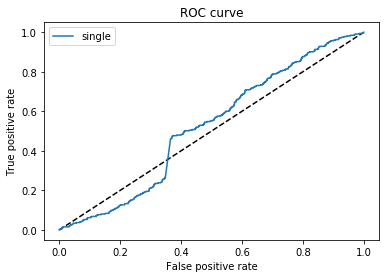

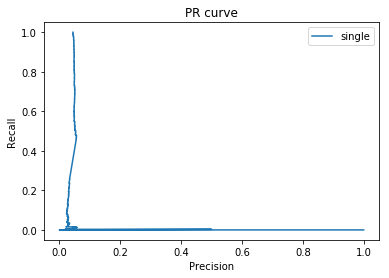

In [154]:
ydata.update({'DCA_PL':{'Ytrue': connectmat_binary.ravel() , 'Ypred':predmat.ravel() }} )
ROC_curve_single(  connectmat_binary.ravel(),   predmat.ravel()  )


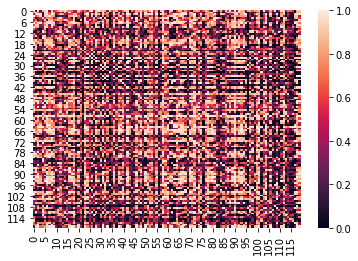

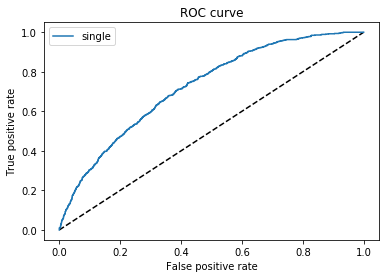

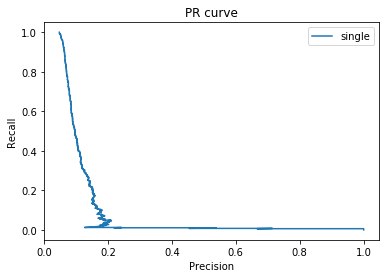

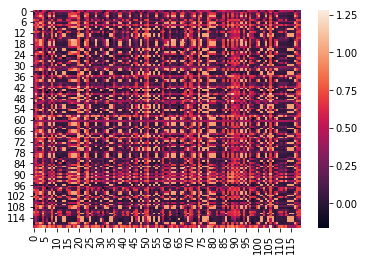

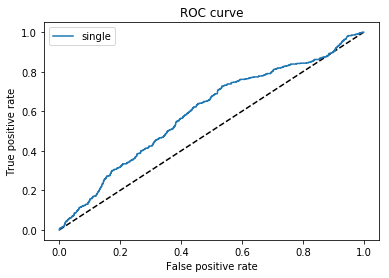

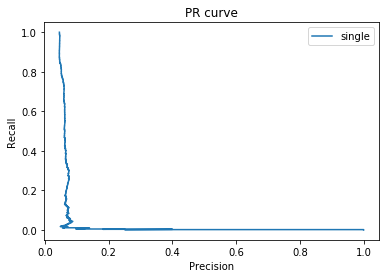

In [153]:
nfams = subprofiles.shape[0]
xtest = np.vstack([ [ np.hstack([ subprofiles[i,:], subprofiles[j,:] ]) for i in range(nfams) ] for j in range(nfams) ] )
    

ymatnn = model.predict(xtest).reshape((nfams,nfams))

sns.heatmap(ymatnn)
plt.show()
ROC_curve_single(  connectmat_binary.ravel(),   ymatnn.ravel()  )



ymatrbm = regr.predict(rbm.transform(xtest)).reshape((nfams,nfams))
sns.heatmap(ymatrbm)
plt.show()
ROC_curve_single(  connectmat_binary.ravel(),   ymatrbm.ravel()  )


In [157]:
#test the interaction detection power of just the jkern first

import multiprocessing as mp
#generate submatrices for inversion

hashes = p.pull_hashes(fams)


def yieldpairs(hashes):
    for i,h1 in enumerate(hashes):
        for j,h2 in enumerate(hashes):
            if i < j:
                yield [i,j,h1,h2]
def distance(work):
    i,j,h1,h2 = work
    return [i,j,h1.jaccard(h2)]

pool = mp.Pool()
hashes = list(hashes.values())
res = pool.map_async( distance , yieldpairs(hashes)).get()
i,j, dist = zip(*res)
jkern = np.zeros( (len(hashes),len(hashes)))
jkern[i,j]=dist
jkern += jkern.T
np.fill_diagonal(jkern, 1)

pool.close()

[INFO/ForkPoolWorker-393] child process calling self.run()
[INFO/ForkPoolWorker-394] child process calling self.run()
[INFO/ForkPoolWorker-395] child process calling self.run()
[INFO/ForkPoolWorker-396] child process calling self.run()
[INFO/ForkPoolWorker-397] child process calling self.run()
[INFO/ForkPoolWorker-398] child process calling self.run()
[INFO/ForkPoolWorker-399] child process calling self.run()
[INFO/ForkPoolWorker-400] child process calling self.run()
[INFO/ForkPoolWorker-401] child process calling self.run()
[INFO/ForkPoolWorker-402] child process calling self.run()
[INFO/ForkPoolWorker-403] child process calling self.run()
[INFO/ForkPoolWorker-404] child process calling self.run()
[INFO/ForkPoolWorker-405] child process calling self.run()
[INFO/ForkPoolWorker-406] child process calling self.run()
[INFO/ForkPoolWorker-407] child process calling self.run()
[INFO/ForkPoolWorker-408] child process calling self.run()
[INFO/ForkPoolWorker-409] child process calling self.run

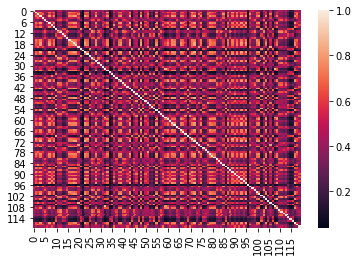

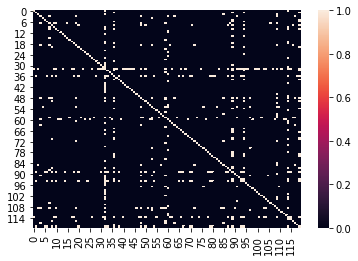

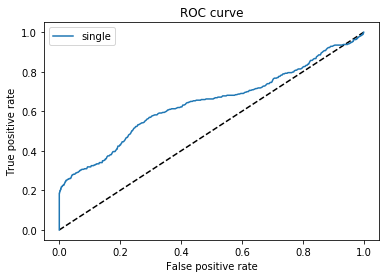

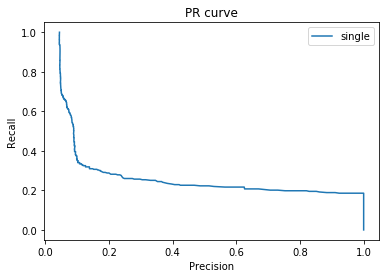

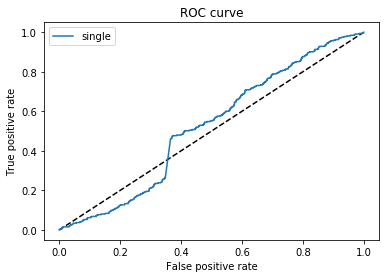

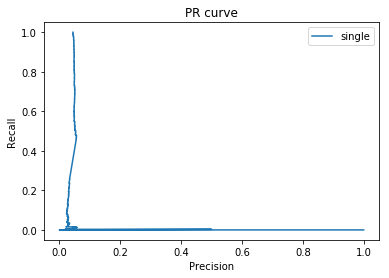

In [158]:

sns.heatmap(jkern)
plt.show()

sns.heatmap(connectmat_binary)
plt.show()



ROC_curve_single( connectmat_binary.ravel()  , jkern.ravel() )

ROC_curve_single(connectmat_binary.ravel() , predmat.ravel() )


In [ ]:
#lets compare the organisation of the complex in both as graph structures
import networkx as nx



pG = nx.from_numpy_matrix( pearsondf.to_numpy() )
jG = nx.from_numpy_matrix( jkern )
pG = nx.relabel_nodes( pG , { i:p for i,p in enumerate(pearsondf.index) })
jG = nx.relabel_nodes( jG , { i:p for i,p in enumerate(profiles.name) })
print(pG)
print(jG)
alledges={}
shared={}
topk = 20

for g in [jG, pG]:
    finalg = nx.Graph()
    for n in g.nodes():
        alledges = [ (n,l) for l in g.neighbors(n) if n != l ]
        weights = [ g[e[0]][e[1]]['weight'] for e in alledges]
        keep = np.flip(np.argsort(weights))[0:topk]
        edges = [ alledges[s] for s in list(keep) ]
        [  finalg.add_edge(e[0],e[1], weight= max(1/(i +1),g[e[0]][e[1]]['weight']) ) if finalg.has_edge(e[0],e[1]) else finalg.add_edge(e[0],e[1], weight= g[e[0]][e[1]]['weight']) for i,e in enumerate(edges)   ]
    pos = nx.spring_layout( finalg , weight='weight')
    weights = np.asarray([e[2]['weight'] for e in g.edges(data = True)])
    plt.figure( figsize = (17,17))
    cvec = [ colordict[n] if n in colordict else 'black' for n in finalg.nodes()]
    nx.draw(finalg, pos=pos, edge_color='grey', width= 2*np.log( weights ), node_size= 700, node_color = cvec ,alpha = .25 ) 
    labels=nx.draw_networkx_labels(finalg , pos = pos , font_size= 25 )
    plt.show()


In [22]:
with open( '/home/cactuskid13/mntpt/CATH/cath-names.txt') as cathin:
    cathnames  = { i:{  j : w.strip()   for j,w in enumerate(l.split('    ')) } for i,l in enumerate(cathin)  if l[0] != '#'}
cathdf = pd.DataFrame.from_dict(cathnames, orient= 'index')
mapper = dict(zip(cathdf[0], cathdf[2]))

FileNotFoundError: [Errno 2] No such file or directory: '/home/cactuskid13/mntpt/CATH/cath-names.txt'

In [ ]:
def hog_arch(fam):
    try:
        return p.db_obj.get_representative_entry_of_hog(fam)
    except:
        return None

def annotate_domain( domainlist ):
    if domainlist is not None:
        return [ mapper[ x[1].decode() ] if x[1].decode() in mapper else None for x in domainlist ]
    else:
        return None

In [ ]:
result_domains = { h : { 'rep_entry': hog_arch(h)} for h in set(hogs+ list(res.keys()) )}
print(result_domains)
result_domains = pd.DataFrame.from_dict( result_domains, orient = 'index')
result_domains['domains'] =  result_domains.rep_entry.map( lambda x : x['domains'] if x else None )
result_domains['cath'] = result_domains['domains'].map( annotate_domain) 

In [ ]:
def hog_arch(fam):
    try:
        return p.db_obj.get_representative_entry_of_hog(fam)
    except:
        return None
explicit_profiles['prots'] = explicit_profiles.index.map( hog_arch )
explicit_profiles['domains'] = explicit_profiles.prots.map( lambda x : x['domains'] if x else None )

In [ ]:
with open( '/home/cactuskid13/mntpt/CATH/cath-names.txt') as cathin:
    cathnames  = { i:{  j : w.strip()   for j,w in enumerate(l.split('    ')) } for i,l in enumerate(cathin)  if l[0] != '#'}
cathdf = pd.DataFrame.from_dict(cathnames, orient= 'index')
mapper = dict(zip(cathdf[0], cathdf[2]))